In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
digit_data = pd.read_csv('./data/digit_train.csv')

In [64]:
digit_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
digit_data.shape

(42000, 785)

### EDA(탐색적 데이터 분석)

In [66]:
img0 = digit_data.iloc[0, 1 : ]

In [67]:
# img0의 최대값과 최소값 알아보기
img0.max(), img0.min()

(255, 0)

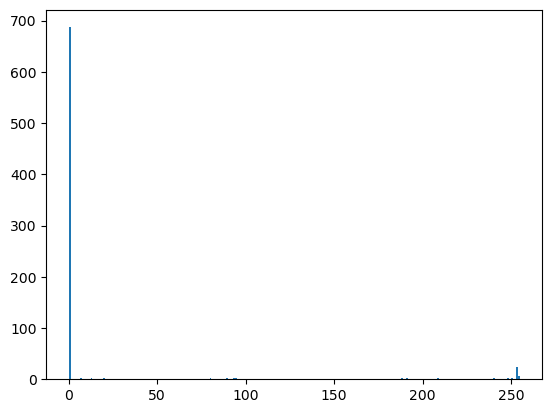

In [68]:
# 데이터 분포도 확인하기
plt.hist(img0, bins=250)
plt.show()

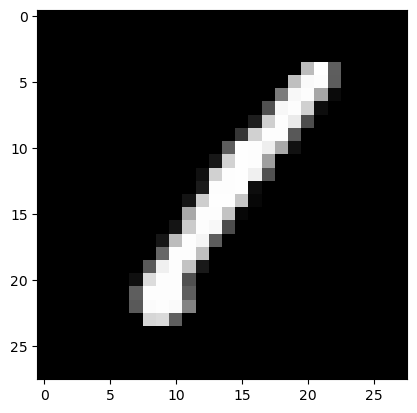

In [69]:
# 이미지로 출력해보기
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

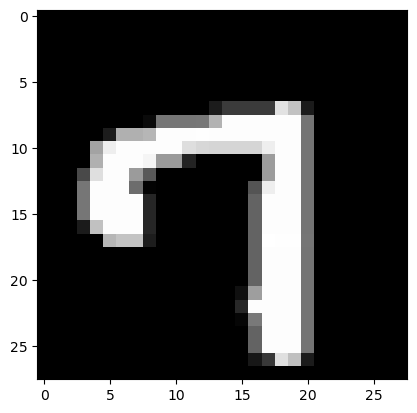

In [70]:
img0 = digit_data.iloc[22222, 1 : ]
# 이미지로 출력해보기
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

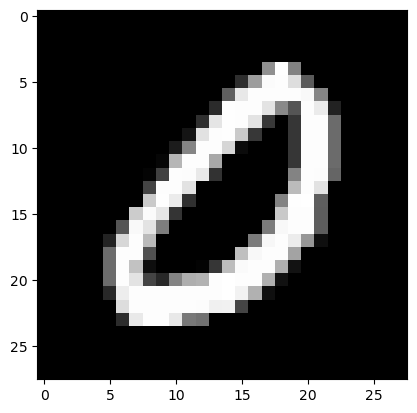

In [71]:
img0 = digit_data.iloc[17, 1 : ]
# 이미지로 출력해보기
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

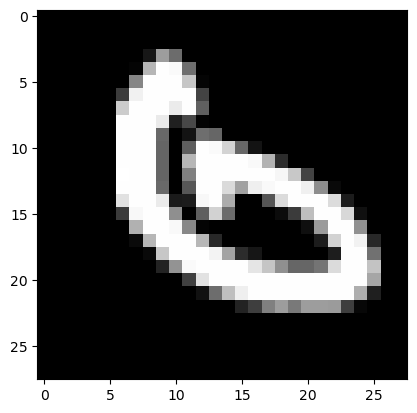

In [72]:
img0 = digit_data.iloc[179, 1 : ]
# 이미지로 출력해보기
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

In [73]:
print(digit_data.iloc[179, 0])

6


### 5000장 추출

In [74]:
X = digit_data.iloc[ : 5000, 1 :]
y = digit_data.iloc[ : 5000, 0 ]
print(X.shape)
print(y.shape)

(5000, 784)
(5000,)


In [75]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3500, 784)
(3500,)
(1500, 784)
(1500,)


### 모델링 (교차검증)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [78]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
logi_model = LogisticRegression()

In [79]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [86]:
knn_result = cross_val_score(knn_model, X_train, y_train, cv=5)
tree_result = cross_val_score(tree_model, X_train, y_train, cv=5)
logi_result = cross_val_score(logi_model, X_train, y_train, cv=5)

In [87]:
print("knn >> ", knn_result)
print("knn >> ", knn_result.mean(),'\n')
print("tree >> ",tree_result)
print("tree >> ",tree_result.mean(),'\n')
print("logi >> ",logi_result)
print("logi >> ",logi_result.mean(),'\n')

knn >>  [0.92142857 0.91857143 0.90857143 0.93285714 0.91142857]
knn >>  0.9185714285714285 

tree >>  [0.75142857 0.68285714 0.72428571 0.75142857 0.73571429]
tree >>  0.7291428571428571 

logi >>  [0.89285714 0.85714286 0.87428571 0.87428571 0.88142857]
logi >>  0.8760000000000001 



### 스케일링

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
min_max = MinMaxScaler()

In [91]:
min_max.fit(X_train)

MinMaxScaler()

In [92]:
# 데이터 변환 -> 스케일링 적용
X_train_scale = min_max.transform(X_train)
X_test_scale = min_max.transform(X_test)

In [94]:
import matplotlib.pyplot as plt

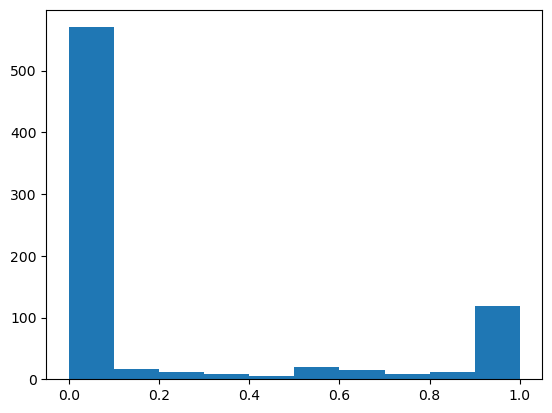

In [95]:
plt.hist(X_train_scale[0])
plt.show()

In [97]:
knn_model2 = cross_val_score(knn_model, X_train_scale, y_train, cv=5)
logi_model2 = cross_val_score(logi_model, X_train_scale, y_train, cv=5)

In [98]:
print(knn_model2.mean())
print(logi_model2.mean())

0.9179999999999999
0.8960000000000001


### test score 확인

In [100]:
# 모델 학습 진행
knn_model.fit(X_train_scale, y_train)
tree_model.fit(X_train, y_train)
logi_model.fit(X_train_scale, y_train)

LogisticRegression()

In [101]:
print(knn_model.score(X_test_scale, y_test))
print(tree_model.score(X_test, y_test))
print(logi_model.score(X_test_scale, y_test))

0.9113333333333333
0.756
0.8846666666666667


### 분류 예측의 불확실성

In [103]:
knn_model.predict_proba(X_test[50:80])

array([[0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8],
       [0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.4, 0.2, 0.2],
       [0.2, 0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.6, 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. ],
       [0.2, 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0.2, 0.2],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0.2],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0.2, 0. , 0.2, 0.4, 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0.4, 0.2, 0. , 0.2, 0. , 0.2],
       [0. , 0. , 0.4, 0. , 0. , 0.2, 0.2, 0. , 0. , 0.2],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. 

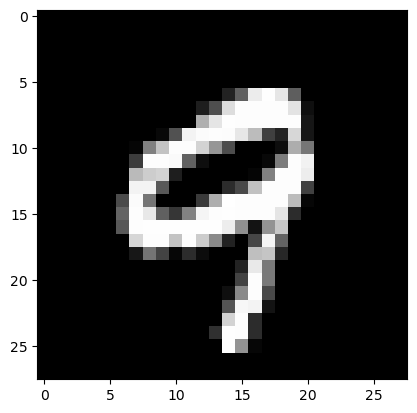

In [104]:
img0 =X_test.iloc[50]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()